In [61]:
# import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# set display options
pd.set_option('display.max_columns', None)

In [3]:
# import dataset
housing = pd.read_csv('Ames_HousePrice.csv', index_col=0)
real_estate = pd.read_csv('./data/Ames_Real_Estate_Data.csv')

D:\Software\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (36,40,81,87) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Basic EDA

In [3]:
housing.head()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,NaN,Detchd,1930.0,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,Ex,Y,SBrkr,810,855,0,1.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2001.0,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


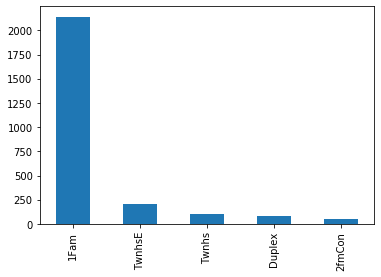

In [8]:
housing['BldgType'].value_counts().plot(kind='bar')

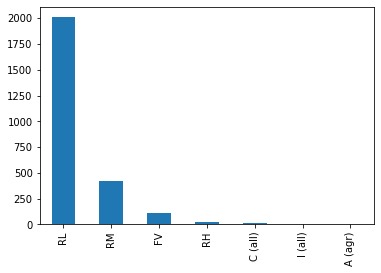

In [11]:
housing.MSZoning.value_counts().plot(kind='bar')

In [53]:
housing[housing.MSZoning=='C (all)']

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,NaN,Detchd,1930.0,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
128,911102180,1049,80900,50,C (all),52.0,5150,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Feedr,Norm,1Fam,1.5Fin,4,7,1910,2000,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,PConc,Po,TA,No,Unf,0.0,Unf,0.0,356.0,356.0,GasA,TA,N,FuseA,671,378,0,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1910.0,Unf,1.0,195.0,Po,Fa,N,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal
167,911175440,1396,115000,190,C (all),50.0,9000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,2fmCon,1.5Fin,5,6,1951,1951,Gable,CompShg,WdShing,Wd Shng,None,0.0,Fa,Fa,CBlock,TA,TA,Mn,Unf,0.0,Unf,0.0,660.0,660.0,GasA,TA,N,SBrkr,1060,336,0,0.0,0.0,2,0,4,2,TA,8,Min2,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,10,2006,WD,Abnorml
255,902332030,2291,133900,190,C (all),60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,2fmCon,2.5Unf,6,6,1910,1998,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,Fa,Mn,Rec,1046.0,Unf,0.0,168.0,1214.0,GasW,Ex,N,SBrkr,1260,1031,0,0.0,1.0,2,0,4,2,TA,9,Typ,1,Gd,Detchd,1900.0,Unf,2.0,506.0,TA,TA,Y,0,0,0,0,99,0,NaN,NaN,NaN,0,11,2007,WD,Normal
559,902477120,720,34900,30,C (all),60.0,7879,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,4,5,1920,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,495.0,Unf,0.0,225.0,720.0,GasA,TA,N,FuseA,720,0,0,0.0,0.0,1,0,2,1,TA,4,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,523,115,0,0,0,NaN,GdWo,NaN,0,11,2009,WD,Abnorml
645,911175430,480,35311,20,C (all),50.0,9000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,3,1949,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,TA,CBlock,TA,TA,Av,BLQ,50.0,Unf,0.0,430.0,480.0,GasA,TA,N,FuseA,480,0,0,1.0,0.0,0,0,1,1,TA,4,Typ,0,NaN,Detchd,1958.0,Unf,1.0,308.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,10,2006,WD,Abnorml
671,911128180,1128,68400,50,C (all),60.0,7500,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1.5Fin,4,4,1920,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,698.0,698.0,GasA,TA,Y,FuseA,698,430,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1980.0,RFn,2.0,528.0,TA,TA,Y,30,0,164,0,0,0,NaN,NaN,NaN,0,4,2010,COD,Abnorml
741,911102170,1317,40000,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,1Fam,2Story,4,4,1920,1950,Gambrel,CompShg,BrkFace,BrkFace,None,0.0,TA,Fa,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,649.0,649.0,GasA,TA,N,SBrkr,649,668,0,0.0,0.0,1,0,3,1,TA,6,Typ,0,NaN,Detchd,1920.0,Unf,1.0,250.0,TA,Fa,N,0,54,172,0,0,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal
835,911226010,894,81000,30,C (all),120.0,18000,Grvl,NaN,Reg,Low,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,3,4,1935,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,Fa,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,894.0,894.0,GasA,TA,Y,SBrkr,894,0,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1994.0,RFn,3.0,1248.0,TA,TA,Y,0,20,0,0,0,0,NaN

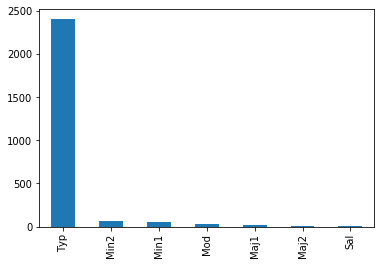

In [37]:
housing.Functional.value_counts().plot(kind='bar')

In [38]:
housing[housing.Functional=='Sal']

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
206,903484080,1484,50000,50,RM,60.0,10320,Pave,Grvl,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Artery,Norm,1Fam,1.5Fin,4,1,1910,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,Fa,CBlock,TA,Fa,No,Unf,0.0,Unf,0.0,771.0,771.0,GasA,Fa,Y,SBrkr,866,504,114,0.0,0.0,2,0,3,1,TA,6,Sal,0,NaN,Detchd,1910.0,Unf,1.0,264.0,TA,Fa,N,14,211,0,0,84,0,NaN,NaN,NaN,0,9,2007,COD,Abnorml


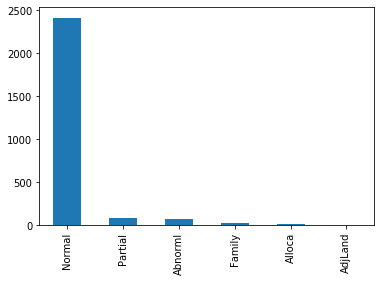

In [39]:
housing.SaleCondition.value_counts().plot(kind='bar')

In [47]:
housing[~housing.MiscFeature.isna()]

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
20,923252075,1091,131250,80,RL,62.0,7706,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SLvl,6,5,1993,1996,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Gd,CBlock,Gd,TA,Av,Rec,114.0,GLQ,270.0,0.0,384.0,GasA,Ex,Y,SBrkr,1091,0,0,0.0,1.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1993.0,Fin,1.0,429.0,TA,TA,Y,280,0,0,0,0,0,NaN,NaN,Shed,700,8,2009,WD,Normal
29,534128010,2090,200000,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859.0,BLQ,32.0,216.0,1107.0,GasA,Ex,Y,SBrkr,1107,983,0,1.0,0.0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2.0,484.0,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal
43,535425060,1312,186000,20,RL,76.0,11355,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,7,1958,2001,Gable,Tar&Grv,HdBoard,HdBoard,BrkFace,125.0,TA,TA,CBlock,TA,TA,No,BLQ,637.0,Unf,0.0,675.0,1312.0,GasA,Ex,Y,SBrkr,1312,0,0,0.0,0.0,1,1,3,1,TA,6,Typ,1,Gd,Attchd,1958.0,RFn,2.0,495.0,TA,TA,Y,0,304,144,0,0,0,NaN,MnPrv,Othr,6500,4,2008,WD,Normal
51,909176170,2592,150000,90,RL,60.0,10890,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,Duplex,2Story,5,6,1923,1950,Hip,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,TA,TA,Mn,Rec,371.0,Unf,0.0,925.0,1296.0,Grav,Fa,N,FuseA,1296,1296,0,2.0,0.0,2,0,6,2,TA,12,Min2,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,742,240,0,0,0,NaN,NaN,Shed,1512,1,2007,WD,AdjLand
106,534275170,958,151500,20,RL,NaN,12772,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,8,1960,1998,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,CBlock,TA,TA,Mn,BLQ,498.0,Unf,0.0,460.0,958.0,GasA,TA,Y,SBrkr,958,0,0,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1960.0,RFn,1.0,301.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,Gar2,15500,4,2007,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,909101010,1196,110000,50,RL,67.0,12354,Pave,Grvl,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,1.5Fin,6,8,1920,2000,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,Fa,Mn,Unf,0.0,Unf,0.0,684.0,684.0,GasA,Gd,Y,SBrkr,684,512,0,0.0,0.0,1,0,3,1,Gd,7,Typ,0,NaN,Detchd,2005.0,Unf,2.0,528.0,TA,TA,Y,0,46,0,0,0,0,NaN,GdPrv,Shed,800,8,2009,ConLI,Normal
666,535382130,1466,170000,50,RL,60.0,10800,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1.5Fin,5,8,1936,1989,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,Fa,TA,No,ALQ,626.0,Unf,0.0,170.0,796.0,GasA,Gd,Y,SBrkr,1096,370,0,0.0,1.0,2,0,3,1,Gd,7,Min1,1,TA,Attchd,1950.0,Unf,2.0,566.0,TA,TA,Y,436,21,0,0,0,0,NaN,NaN,Shed,500,4,2006,WD,Normal
679,903231070,1176,114500,50,RM,52.0,6240,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Fin,6,6,1934,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,PConc,TA,TA,No,Unf,0.0,Unf,0.0,816.0,816.0,GasA,TA,Y,SBrkr,816,0,360,0.0,0.0,1,0,3,1,TA,6,Typ,1,Gd,Detchd,1985.0,Unf,2.0,528.0,TA,TA,Y,112,0,0,0,0,0,NaN,MnPrv,Shed,4

In [48]:
housing[housing.MiscVal > 5000]

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
43,535425060,1312,186000,20,RL,76.0,11355,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,7,1958,2001,Gable,Tar&Grv,HdBoard,HdBoard,BrkFace,125.0,TA,TA,CBlock,TA,TA,No,BLQ,637.0,Unf,0.0,675.0,1312.0,GasA,Ex,Y,SBrkr,1312,0,0,0.0,0.0,1,1,3,1,TA,6,Typ,1,Gd,Attchd,1958.0,RFn,2.0,495.0,TA,TA,Y,0,304,144,0,0,0,NaN,MnPrv,Othr,6500,4,2008,WD,Normal
106,534275170,958,151500,20,RL,NaN,12772,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,8,1960,1998,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,CBlock,TA,TA,Mn,BLQ,498.0,Unf,0.0,460.0,958.0,GasA,TA,Y,SBrkr,958,0,0,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1960.0,RFn,1.0,301.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,Gar2,15500,4,2007,WD,Normal
527,526351010,1329,172000,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
290,533352075,2620,190000,90,RL,NaN,18890,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Feedr,RRAe,Duplex,1.5Fin,5,5,1977,1977,Shed,CompShg,Plywood,Plywood,None,1.0,TA,TA,CBlock,Gd,TA,No,GLQ,498.0,Rec,211.0,652.0,1361.0,GasA,Ex,Y,SBrkr,1361,1259,0,0.0,0.0,2,2,4,2,TA,12,Typ,1,TA,BuiltIn,1977.0,RFn,2.0,600.0,TA,TA,N,155,24,145,0,0,0,NaN,NaN,Gar2,8300,8,2007,WD,Normal


# Advanced EDA

### Compare housing prices by whether they have a pool, garage, porch, etc.

In [67]:
housing['HasGarage'] = np.where(housing.GarageCars > 0, 1, 0)
housing['HasPool'] = np.where(housing.PoolArea > 0, 1, 0)
housing['PorchTotSF'] = housing.OpenPorchSF + housing.EnclosedPorch + housing['3SsnPorch'] + housing.ScreenPorch
housing['HasPorch'] = np.where(housing.PorchTotSF > 0, 1, 0)
housing['HasDeck'] = np.where(housing.WoodDeckSF > 0, 1, 0)
housing['HasFinBsmt'] = np.where(housing.BsmtFinSF1 > 0, 1, 0)

In [68]:
housing.HasFinBsmt.mean()

0.6996124031007752

In [105]:
from scipy import stats
cols = ['HasGarage', 'HasPool', 'HasPorch', 'HasDeck', 'HasFinBsmt']
for col_ in cols:
    print('Does ' + col_ + ' have a significant effect?\n')
    print(housing.groupby(col_).agg({'SalePrice':['mean','std']})/100000)
    a = housing[housing[col_]==0].SalePrice
    b = housing[housing[col_]==1].SalePrice
    t, p = stats.ttest_ind(a, b)
    print('\nUsing a paired t-test, the t-score is %f, and the p value is %f \n' % (t,p))
    diff_ = np.mean(b-a)/1000
    print('On average, houses with ' + col_ + ' are worth %.0f thousand more dollars.\n' % diff_)

Does HasGarage have a significant effect?

          SalePrice          
               mean       std
HasGarage                    
0          1.063991  0.332235
1          1.818005  0.747281

Using a paired t-test, the t-score is -11.355537, and the p value is 0.000000 

On average, houses with HasGarage are worth 70 thousand more dollars.

Does HasPool have a significant effect?

        SalePrice          
             mean       std
HasPool                    
0        1.777870  0.745717
1        2.559444  1.468440

Using a paired t-test, the t-score is -3.124844, and the p value is 0.001799 

On average, houses with HasPool are worth 77 thousand more dollars.

Does HasPorch have a significant effect?

         SalePrice          
              mean       std
HasPorch                    
0         1.451074  0.507303
1         1.925498  0.792962

Using a paired t-test, the t-score is -15.460263, and the p value is 0.000000 

On average, houses with HasPorch are worth 46 thousand mo

### Compare attached vs detached garages:

In [36]:
housing_garages = housing[['GrLivArea','SalePrice','GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond']]
housing_garages = housing_garages.dropna()

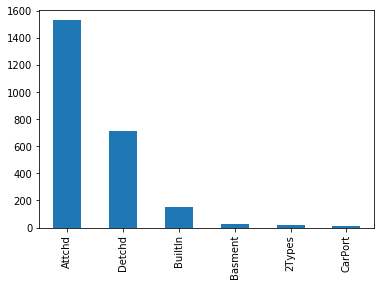

In [37]:
housing_garages.GarageType.value_counts().plot(kind='bar')

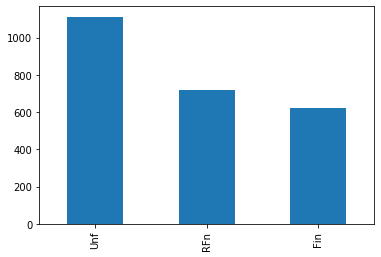

In [38]:
housing_garages.GarageFinish.value_counts().plot(kind='bar')

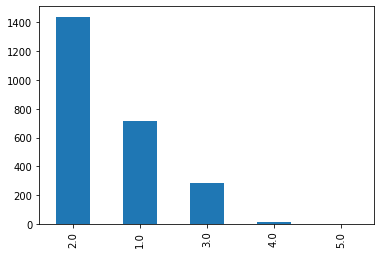

In [39]:
housing_garages.GarageCars.value_counts().plot(kind='bar')

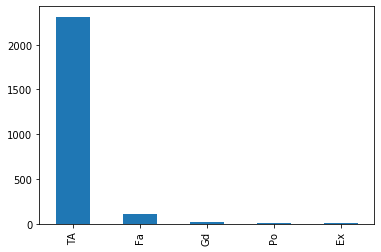

In [40]:
housing_garages.GarageQual.value_counts().plot(kind='bar')

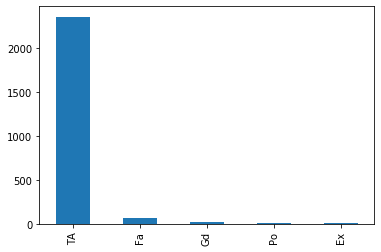

In [41]:
housing_garages.GarageCond.value_counts().plot(kind='bar')

In [64]:
housing_garages_dummified = pd.get_dummies(housing_garages).drop(['GarageType_Attchd','GarageFinish_Unf','GarageQual_TA','GarageCond_TA'], axis=1)
y = housing_garages_dummified['SalePrice']
y = np.log(y)
housing_garages_dummified.drop('SalePrice', axis=1, inplace=True)
housing_garages_dummified['GrLivArea'] = np.log(housing_garages_dummified['GrLivArea'])
x = housing_garages_dummified

In [65]:
from sklearn.linear_model import LassoCV
lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(x, y)

Text(0.5, 1.0, 'Coefficients in the Lasso Model')

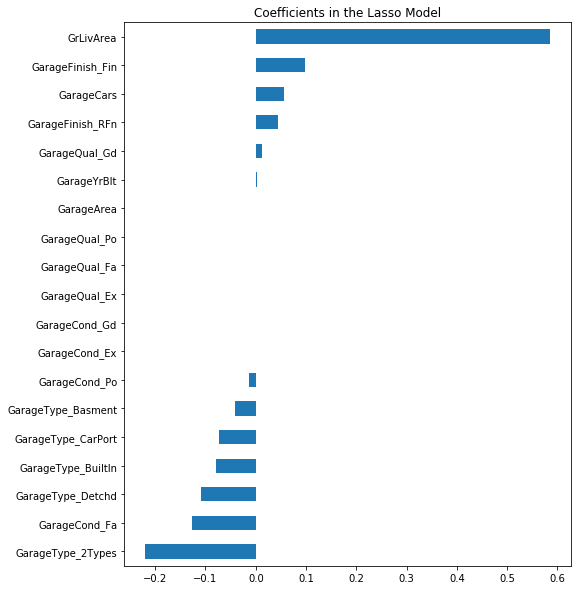

In [66]:
coef = pd.Series(lasso.coef_, index = x.columns)
imp_coef = pd.concat([coef.sort_values()])
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

**Conclusions:** Lasso penalized regression eliminates several garage varaibles, including the garage area, garage year built, and most interestingly, the garage *quality*. The most important positive varaibles are the number of cars and whether the garage is finished or not (consider combining Fin + RFN). The most important negative variables are unattached garages (consider combining all unattached) and having a fair/poor garage condition (consider combining).